   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%    

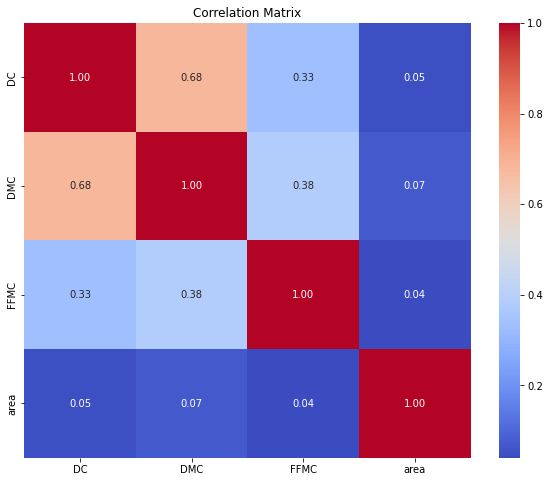

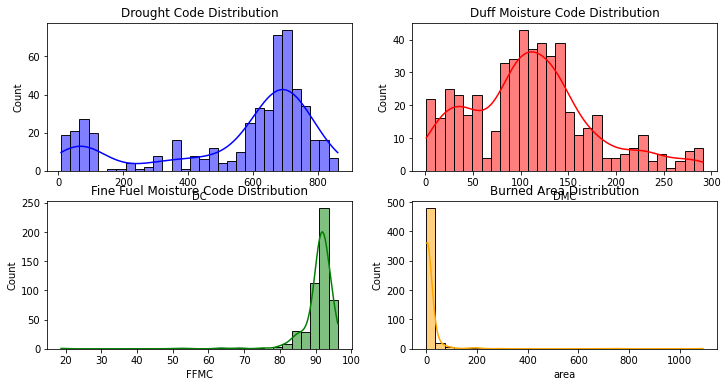

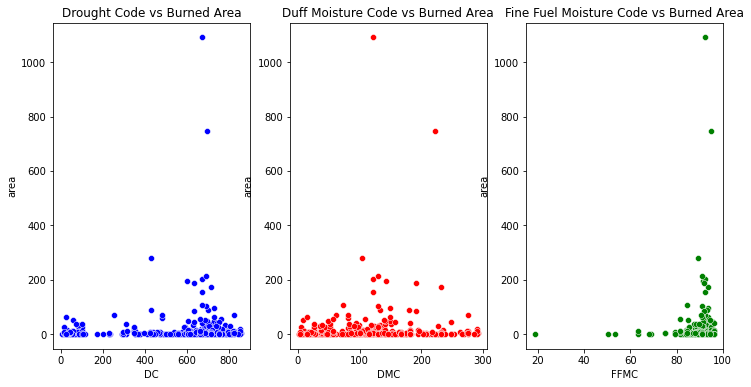

In [1]:
# -*- coding: utf-8 -*-
"""ForestFires_ChristianRamirez.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/127wpqcyGOEMOFDMobqR3-tYvbfVIS2-x
"""



"""**First Delivery**

Regression problem

Forest Fires Dataset (Indices  from the  Fire Weather Index System:  Drought Code DC, Duff Moisture Code DMC and Fine Fuel Moisture Code FFMC)

by Christian Ramirez

Tasks included:


1.   Analyze and understand the provided dataset through Exploratory Data Analysis.
2.   Determine the insight you want to address with a machine learning model.

1.    Identify why an MLOps strategy is needed for this dataset. (Module 1)
2.   Design the pipeline architecture for this new machine learning initiative.

1.   Create a baseline model to address prediction tasks (classification, regression, etc.) related to the question. This model does not need high accuracy, recall, or F1 score; the goal is to create a quick model for iteration. (Module 4)









"""

##Module 1 EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (https://archive.ics.uci.edu/dataset/162/forest+fires)
data_path = "forestfires.csv"
df = pd.read_csv(data_path)

# Displaying the first few data rows
print(df.head())

#Describing data to get a better idea of data
print(df.describe())

correlation_matrix = df[['DC', 'DMC', 'FFMC', 'area']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Dist plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['DC'], bins=30, kde=True, color='blue')
plt.title('Drought Code Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['DMC'], bins=30, kde=True, color='red')
plt.title('Duff Moisture Code Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['FFMC'], bins=30, kde=True, color='green')
plt.title('Fine Fuel Moisture Code Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['area'], bins=30, kde=True, color='orange')
plt.title('Burned Area Distribution')
plt.show()

#scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='DC', y='area', data=df, color='blue')
plt.title('Drought Code vs Burned Area')

plt.subplot(1, 3, 2)
sns.scatterplot(x='DMC', y='area', data=df, color='red')
plt.title('Duff Moisture Code vs Burned Area')

plt.subplot(1, 3, 3)
sns.scatterplot(x='FFMC', y='area', data=df, color='green')
plt.title('Fine Fuel Moisture Code vs Burned Area')
plt.show()



In [2]:

#Module 2
#Determine the insight you want to address with a machine learning model

#TARGET: Predict the burned area of forest fires by using meteorological

#Module 3
#Identify why an MLOps strategy is needed for this dataset. (Module 1)
'''
An MLOps strategy should be use for ensuring their reliability, scalability, maintainability and
compliance with regulatory standards, which in the context of predicting forest fires
 where accuracy and time from prediction to action are most important.
'''

'''
Module 4
Design the pipeline architecture for this new machine learning initiative.

AND

Module 5
Create a baseline model to address prediction tasks (classification, regression, etc.) related to the question.
This model does not need high accuracy, recall, or F1 score; the goal is to create a quick model for iteration. (Module 4)
'''

# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Loading and spliting data
def load_and_split_data(data_path):
    # Loading data
    df = pd.read_csv(data_path)

    # Selected features (DC, DMC, FFMC) and target variable (area)
    X = df[['DC', 'DMC', 'FFMC']]  # Selected features
    y = df['area']  # Target variable

    # Split data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

#Training Model
def train_model(X_train, y_train):
    # Using a Random Forest regression model
    model = RandomForestRegressor()

    # Training the model using training data
    model.fit(X_train, y_train)

    return model

# Evaluating Model
def evaluate_model(model, X_test, y_test):
    # Predicting burned areas
    y_pred = model.predict(X_test)

    # Mean Squared Error and R-squared score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2, y_pred

# Main function
def main():
    # Step 1: Loading and spliting data
    X_train, X_test, y_train, y_test = load_and_split_data(data_path)

    # Step 2: Training Model
    model = train_model(X_train, y_train)

    # Step 3: Evaluating Model
    mse, r2, y_pred = evaluate_model(model, X_test, y_test)
    print("Predicted Area:", y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)


# Executing main function
if __name__ == "__main__":
    main()


Predicted Area: [1.95812674e+01 1.18930809e+01 2.32028135e+00 8.34169286e+00
 9.88681817e+00 1.53340000e+00 7.07740833e+00 6.64339429e+00
 2.18043583e+00 1.71360250e+01 8.85914091e-01 3.97951365e+00
 5.39823968e+00 3.00922937e-01 1.96794167e+00 7.82001333e+00
 3.41123333e+00 8.34169286e+00 6.78499764e+00 6.78499764e+00
 7.29868452e+00 8.90171667e-01 1.63349748e+01 3.58817421e-01
 8.34169286e+00 8.28207143e-01 1.35510000e+00 2.42637333e+01
 1.03766973e+01 3.66544280e+00 5.56635476e-01 1.01298692e+01
 2.92435619e+00 1.96794167e+00 7.93629726e-01 1.60300000e+00
 1.45506262e+01 1.48493996e+01 1.62001306e+01 9.56050000e-02
 4.92032900e+01 3.58817421e-01 2.80352810e+00 4.59372826e+00
 2.06749930e+01 1.68229131e+01 7.29868452e+00 2.83100000e-01
 9.96580152e-01 3.55320000e+00 2.64672095e+00 8.91230458e+01
 1.45506262e+01 9.56050000e-02 9.88681817e+00 5.31635000e+00
 1.14093150e+01 5.39823968e+00 8.73941242e+00 2.92435619e+00
 8.28207143e-01 2.80352810e+00 3.54274988e+01 2.80352810e+00
 1.46993